<a href="https://colab.research.google.com/github/Linafe313/Linafe313/blob/main/Used%20car%20prediction%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Objectives

1) To predict the price of BMW models

2) To minimize the cost function - root mean square error

In [ ]:
#Importing data analysis libraries
import pandas as pd
import numpy as np

IMPORTING THE DATASET FOR PRICE PREDICTION

In [ ]:
df = pd.read_csv("/content/bmw.csv")

In [ ]:
#Previewing the data set
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


DATA CLEANING

In [ ]:
#Checking for missing values
missing_data = df.isnull()
missing_data.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
#Check for missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

model
False    10781
Name: model, dtype: int64

year
False    10781
Name: year, dtype: int64

price
False    10781
Name: price, dtype: int64

transmission
False    10781
Name: transmission, dtype: int64

mileage
False    10781
Name: mileage, dtype: int64

fuelType
False    10781
Name: fuelType, dtype: int64

tax
False    10781
Name: tax, dtype: int64

mpg
False    10781
Name: mpg, dtype: int64

engineSize
False    10781
Name: engineSize, dtype: int64



No missing values

## Quick look at the data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


## Exploring variables - Descriptive Statistics

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


##Explore categorical variables and class distributions

In [ ]:
df["transmission"].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [ ]:
df["fuelType"].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

We have classes that are not balanced. We may need to add weights in the ML - Pipeline

In [ ]:
df["model"].value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 Z4           108
 6 Series     108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

The variables will be transformed in the pipeline

CHECKING FOR DATA FORMATS

In [ ]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

Converting some veriables to suit the model

In [ ]:
#df[["price"]] = df[["price"]].astype("float")
df[["tax"]] = df[["tax"]].astype("float")
df[["mileage"]] = df[["mileage"]].astype("float")

Visual exploration of the distribution of variables

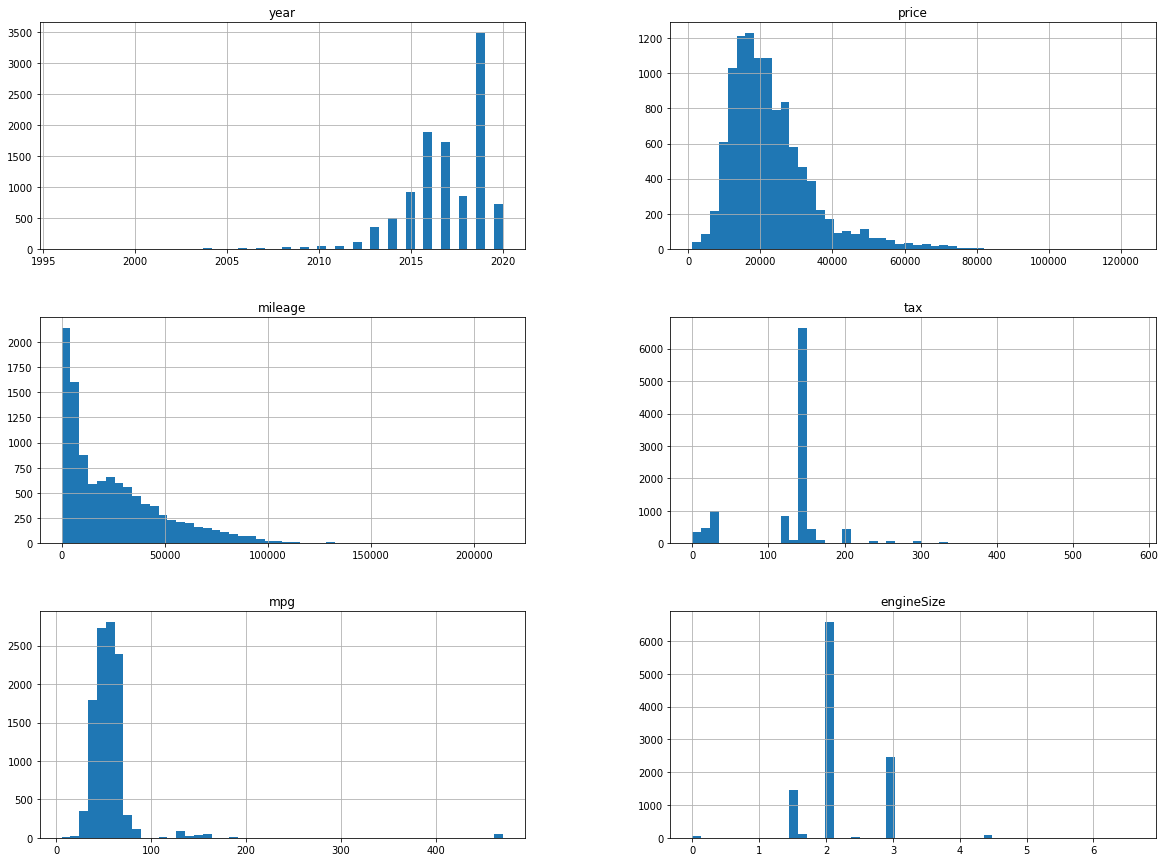

In [ ]:
#Visual exploration
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize = (20,15))
plt.show()

Have some skewed distributions as well as outliers. Need to account for this when refining the model or in preprocessing to stardadize the data

Exploring the data - checking for relationships

In [ ]:
#calling on correlation command
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending = False)

price         1.000000
year          0.623756
engineSize    0.460196
tax           0.263484
mpg          -0.204882
mileage      -0.605397
Name: price, dtype: float64

Have a some correlation on all numerical values

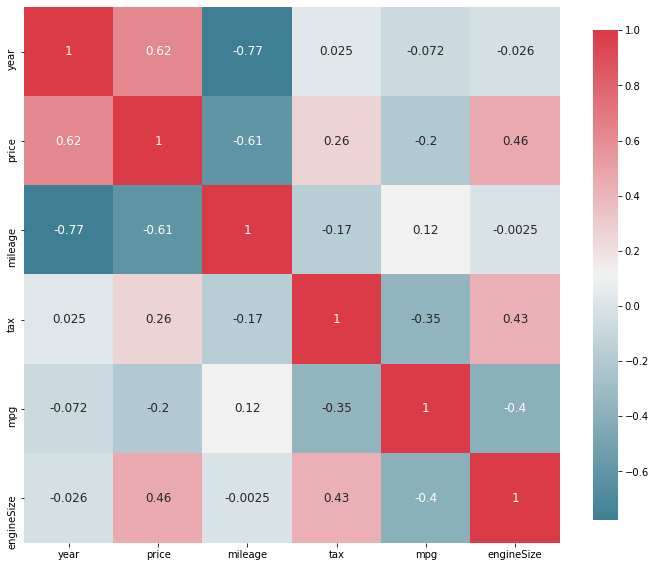

In [ ]:
#plotting visual correlation heat map using sns
import seaborn as sns

color_map, ax = plt.subplots (figsize = (12,10))
corr = df.corr(method = 'pearson')
cmap = sns.diverging_palette(220,10, as_cmap = True)
_ = sns.heatmap (corr, cmap = cmap, square = True, cbar_kws={
    'shrink' : .9}, ax=ax, annot = True, annot_kws = {'fontsize':12})

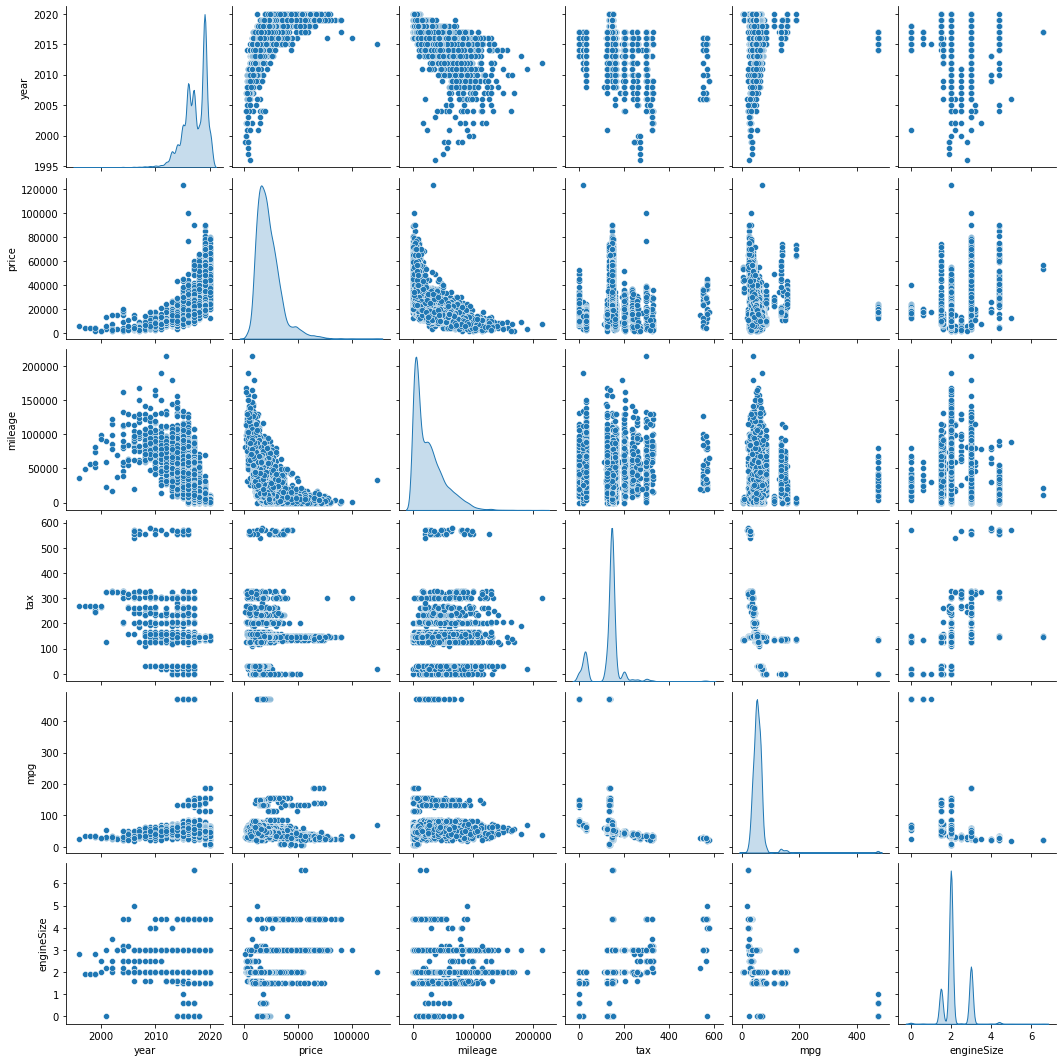

In [ ]:
#Pairplot to check further on the correlated variables

sns.pairplot(df, diag_kind="kde")

## Test regplot of some correlated predictors

(0.0, 131806.16637945233)

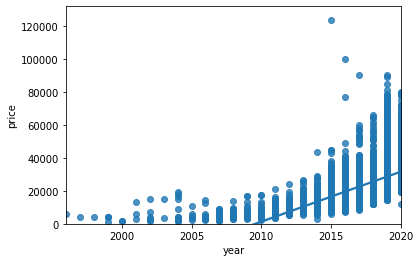

In [ ]:
# Year as potential predictor variable of price
sns.regplot(x="year", y="price", data=df)
plt.ylim(0,)

(0.0, 129571.3936394972)

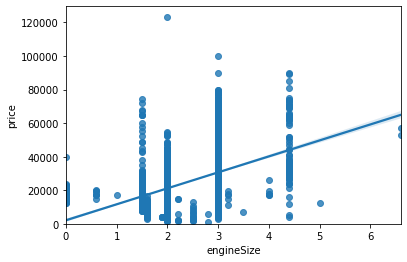

In [ ]:
# Engine size as potential predictor variable of price
sns.regplot(x="engineSize", y="price", data=df)
plt.ylim(0,)

(0.0, 129568.8)

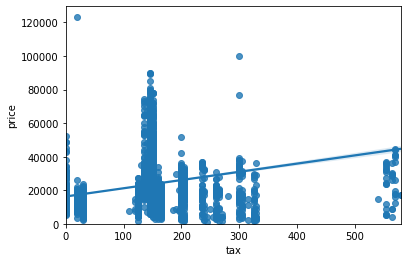

In [ ]:
# Tax as potential predictor variable of price
sns.regplot(x="tax", y="price", data=df)
plt.ylim(0,)

(0.0, 131149.08847606435)

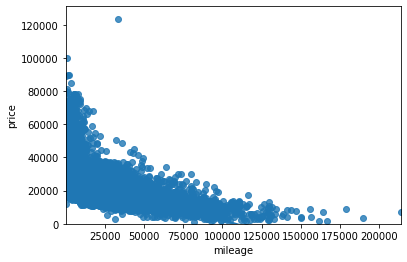

In [ ]:
# Engine size as potential predictor variable of price
sns.regplot(x="mileage", y="price", data=df)
plt.ylim(0,)

Some good correlations between predictors and price. Some may be non-linear, to be considered in model development

Test for correlation in categorical variables


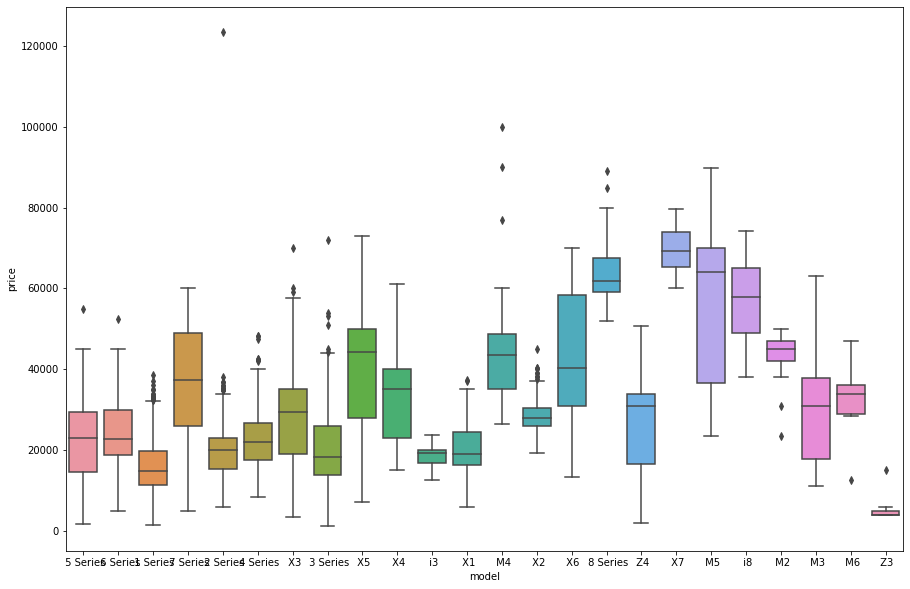

In [ ]:
#Have opted for a boxplot

plt.figure(figsize=(15, 10))
sns.boxplot(x="model", y="price", data=df)

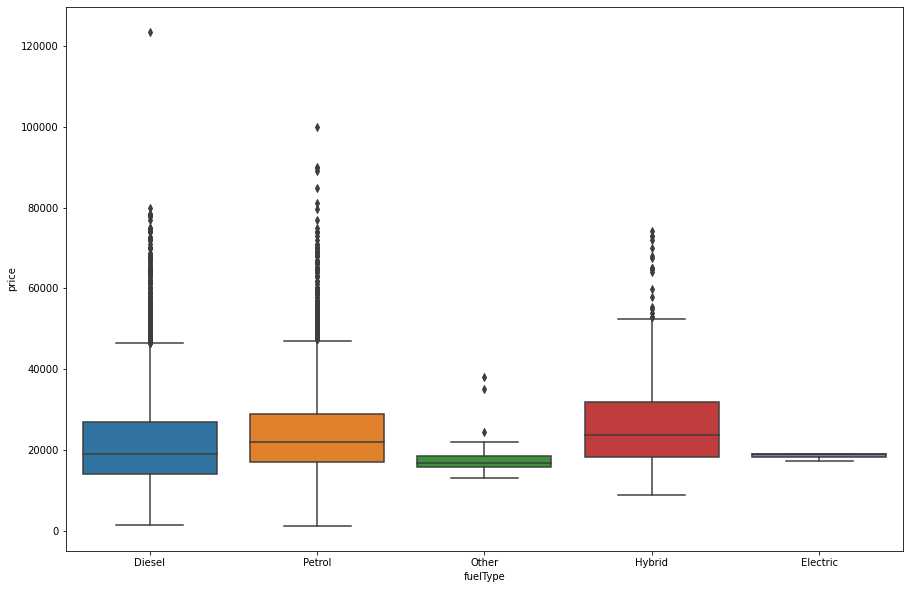

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="fuelType", y="price", data=df)

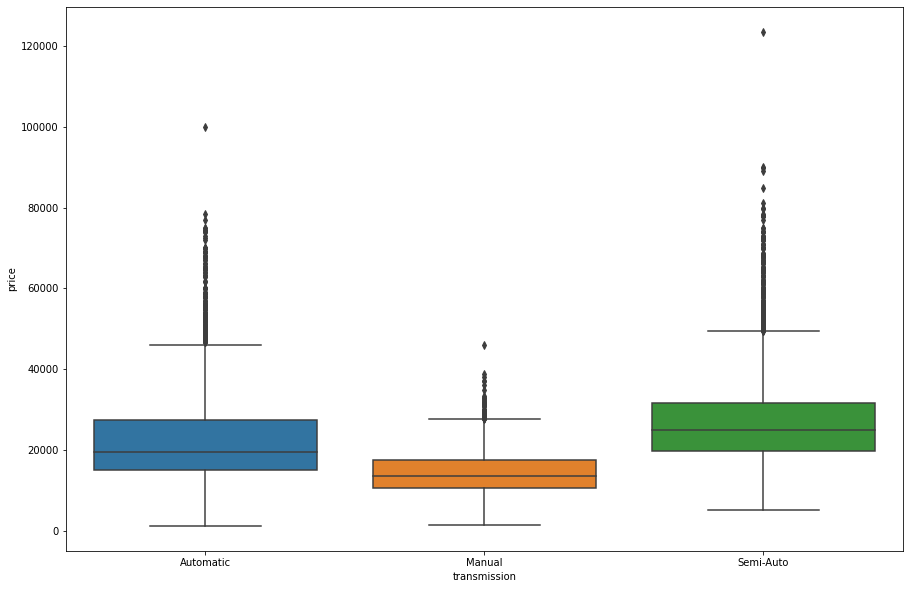

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="transmission", y="price", data=df)

Model-code box plot has the largest variation with price. Model code is the best categorical predictor with a correlation of 0.47

## Check for causation and correlation to select model

In [ ]:
from scipy import stats

#EngineSize
#Significant
pearson_coef, p_value = stats.pearsonr(df["engineSize"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4601961878765551  with a P-value of P = 0.0


In [ ]:
#Year
#Significant
pearson_coef, p_value = stats.pearsonr(df["year"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.623756079132891  with a P-value of P = 0.0


In [ ]:
#Mileage
#Significant
pearson_coef, p_value = stats.pearsonr(df["mileage"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6053967672218263  with a P-value of P = 0.0


In [ ]:
#Tax
#Insignificant
pearson_coef, p_value = stats.pearsonr(df["tax"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2634837523452056  with a P-value of P = 1.1303607405277448e-170


In [ ]:
#mpg
#Insignificant
pearson_coef, p_value = stats.pearsonr(df["mpg"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.2048823013948638  with a P-value of P = 1.5827764453607185e-102


Most variables have some correlation. However some fail the significance test when it comes to relationships. 

Basic descriptive statistics

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


Transformation of categorical variables and numerical through a pipeline

Categorical variables

In [ ]:
#Creating copy of dataframe
df1 = df.drop("price", axis=1)

In [ ]:
#Verifying drop of price variable
df1.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [ ]:
#Isolating the categorical variables within the features
categorical_df = df1[["fuelType", "transmission", "model"]]
categorical_df.head(2)

,fuelType,transmission,model
0,Diesel,Automatic,5 Series
1,Petrol,Automatic,6 Series


In [ ]:
#Isolating numerical variables in the features
numerical_df = df1[["tax", "engineSize", "year", "mileage","mpg"]]
numerical_df.head(2)

,tax,engineSize,year,mileage,mpg
0,125.0,2.0,2014,67068.0,57.6
1,145.0,2.0,2018,14827.0,42.8


Transform independent variables through a preprocessing pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Building the pipeline

In [ ]:
#data transformations
numerical_var = list(numerical_df)
categorical_var = list(categorical_df)

#buiding a pipeline
full_pipeline = ColumnTransformer([
                                   ("num", StandardScaler(), numerical_var),
                                   ("cat", OneHotEncoder(), categorical_var)
])

var_pipeline = full_pipeline.fit_transform(df1)

In [ ]:
#checking the transformed data
type(var_pipeline)

scipy.sparse.csr.csr_matrix

## MODEL DEVELOPMENT AND TRAINING

In [ ]:
#Importing a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Isolating target variable
price_labels = df[["price"]]
price_labels.head(2)

,price
0,11200
1,27000


In [ ]:
reg1 = LinearRegression()
reg1.fit(var_pipeline, price_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Regression coefficients
reg1.coef_


array([[  -675.72256383,   2033.41344116,   4171.60000555,
         -2892.79429213,  -3818.00258205,  -4673.94724974,
          2514.08487169,   4635.05311901,   2767.45151643,
         -5242.6422574 ,   -104.99663771,   -612.2679152 ,
           717.26455289, -15077.30874608, -15180.43702401,
        -12431.66623428, -12470.17658494, -10481.2341909 ,
        -10030.07069084,  -1733.75923673,  17358.48542997,
         -1858.3952633 ,    939.34583408,   1033.67974831,
         11601.50791057,  -2661.62459101, -12678.51001341,
        -11263.94868979,  -6874.77886839,  -5543.36169134,
          1111.41316091,   3511.95738079,  23961.91455584,
          7782.2461277 ,  -9524.50892785,  35569.45634785,
         24939.77425684]])

In [ ]:
#Regression intercept
reg1.intercept_

array([38058.96184996])

First evaluation

In [ ]:
some_data = df.loc[:5]
some_labels = price_labels[:5]
some_data_transformed = full_pipeline.transform(some_data)

print("predictions:" , reg1.predict(some_data_transformed)) #Running regression on transfomed list


predictions: [[11856.96435737]
 [26437.56987154]
 [19955.08772857]
 [13371.43496181]
 [27946.43973507]
 [18758.40478403]]


/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Evaluating the prototype model

In [ ]:
price_predictions = reg1.predict (var_pipeline)
reg1_mse = mean_squared_error (price_labels, price_predictions)
reg1_rmse = np.sqrt(reg1_mse)
reg1_rmse

4153.544269586331

## Prototype model has MSE of 4153

## Quick tests using other models 

In [ ]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg2 = DecisionTreeRegressor()
reg2.fit(var_pipeline, price_labels)

price_predictions2 = reg2.predict (var_pipeline)
reg2_mse = mean_squared_error (price_labels, price_predictions2)
reg2_rmse = np.sqrt(reg2_mse)
reg2_rmse

265.5429246479623

## Second model has RMSE of 265.54

In [ ]:
reg3 = RandomForestRegressor()
reg3.fit(var_pipeline, price_labels)

price_predictions3 = reg3.predict (var_pipeline)
reg3_mse = mean_squared_error (price_labels, price_predictions3)
reg3_rmse = np.sqrt(reg3_mse)
reg3_rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


980.2234983520167

## Third model has RMSE of 1009

Can suspect overfitting

## Visual comparison of models

In [ ]:
#Visual comparison of the prediction variation

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion')

    plt.show()
    plt.close()

First model using linear regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


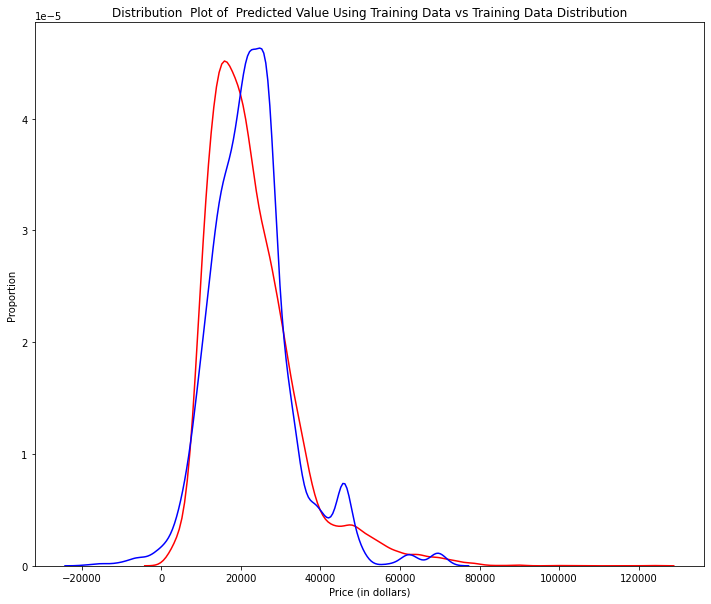

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(price_labels, price_predictions, "Actual Values (Train)", "Predicted Values (Train)", Title)

Second model with decision tree regressor

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


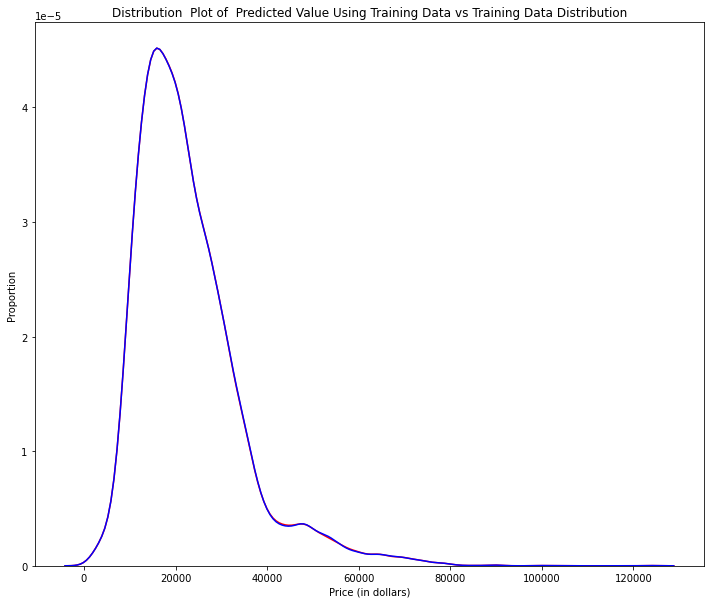

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(price_labels, price_predictions2, "Actual Values (Train)", "Predicted Values (Train)", Title)

Strong evidence of overfitting in the second model. It may not generalize well on unseen data. We need better evaluation techniques

##Cross validation

Allows us to split datasets into groups for validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg2, var_pipeline, price_labels,
                         scoring = "neg_mean_squared_error", cv = 10)

tree_rmse_scores = np.sqrt(-scores)



Cross validation for decision tree

In [ ]:
#Function for pulling out scores
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores (tree_rmse_scores)

Scores: [2819.54143591 2905.84670591 4125.56444021 4586.9563312  3468.15500411
 3865.84754237 4885.64937085 2984.27519469 2408.26434317 4128.48857936]
Mean: 3617.8588947770963
Standard deviation: 784.7088096161903


Cross validation for linear regression

In [ ]:
scores2 = cross_val_score(reg1, var_pipeline, price_labels,
                         scoring = "neg_mean_squared_error", cv = 10)

regression_scores = np.sqrt(-scores2)



In [ ]:
def display_scores(scores2):
  print("Scores:", scores2)
  print("Mean:", scores2.mean())
  print("Standard deviation:", scores2.std())

display_scores (regression_scores)



Scores: [3530.28707221 3797.6027105  3853.25473461 5000.40114858 4656.99239817
 4761.73752596 4644.05782499 3466.28552777 4029.52367104 4524.68345614]
Mean: 4226.482606998215
Standard deviation: 525.2329846276924


Decision tree regressor has a mean rmse score of ***3484.30***

The linear regression has a mean rmse score of ***4226.48***

The RMSE SCORES ARE HIGH

In [ ]:
scores3 = cross_val_score(reg3, var_pipeline, price_labels,
                         scoring = "neg_mean_squared_error", cv = 10)

regression_scores = np.sqrt(-scores3)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
def display_scores(scores3):
  print("Scores:", scores3)
  print("Mean:", scores3.mean())
  print("Standard deviation:", scores3.std())

display_scores (regression_scores)

Scores: [2120.7552547  2237.48394132 3118.60850577 4103.08136392 2862.7246872
 3167.02954991 2934.76573897 2085.22919653 1721.67777279 2136.98648521]
Mean: 2648.834249632674
Standard deviation: 679.6241056402864


Decision tree regressor has a mean rmse score of ***3484.30***

The linear regression has a mean rmse score of ***4226.48***

Random forest Regressor has a mean rmse score of **2660**

## Evaluation using the train test split method to ascertain model performance on unseen data

In [ ]:
#Calling on split function
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(var_pipeline, price_labels, test_size=0.10, random_state=1)

In [ ]:
#Fitting decision tree regressor
lin_reg = DecisionTreeRegressor()
lin_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Prediction test
y_predict = lin_reg.predict(x_test)


In [ ]:
y_predict_train = lin_reg.predict(x_train)

In [ ]:
rmse = mean_squared_error(y_predict, y_test, squared=False)
rmse

3050.4145258856743

In [ ]:
rmse2 = mean_squared_error(y_predict_train, y_train, squared=False)
rmse2

244.20683528092496

Decision tree regressor has rmse score of ***244.20*** on **training data**

Decision tree regressor has rmse score of ***3009*** on **test data**

The model is overfitting

In [ ]:
#Prediction test
y_predict2 = reg3.predict(x_test)
y_predict_train2 = reg3.predict(x_train)
rmse3 = mean_squared_error(y_predict2, y_test, squared=False)
rmse3


839.6648919150225

In [ ]:
rmse4 = mean_squared_error(y_predict_train2, y_train, squared=False)
rmse4

994.6289776531153

Random forest regressor has rmse score of ***1027*** on **training data**

Random forest regressor has rmse score of ***820*** on **test data**

The model is overfitting slightly

## Using neural networks as an alternative model

In [ ]:
from sklearn.neural_network import MLPRegressor 

In [ ]:
Neu_reg = MLPRegressor()
Neu_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
neural_predict = Neu_reg.predict(x_test)
neural_predict[:5]

array([2.91788330e+04, 2.31982250e+04, 7.11347165e+00, 4.79820680e+03,
       2.18880045e+04])

In [ ]:
rmse_nn = mean_squared_error(neural_predict, y_test, squared=False)
rmse_nn

7007.71762466245

Neural network has a rmse of ***6685.30***

## Model refinement - Random forest regressor as best performing model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = [
                   {"n_estimators": [3,10,300], "max_features": [2,4,6,8]},
                   {"bootstrap": [False], "n_estimators": [3,1000], "max_features": [2,3,400]},
                   ]

In [ ]:
reg4 = RandomForestRegressor()


In [ ]:
grid_search = GridSearchCV(reg4, param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)


In [ ]:
grid_search.fit (x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 300}

In [ ]:
#Prediction test
y_predict4 = grid_search.predict(x_test)
y_predict_train4 = grid_search.predict(x_train)
rmse4 = mean_squared_error(y_predict4, y_test, squared=False)
rmse4

2263.182427987098

In [ ]:
#Prediction train
rmse4 = mean_squared_error(y_predict_train4, y_train, squared=False)
rmse4

994.5500642006207

In [ ]:
Random_search = RandomizedSearchCV(reg4, param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

In [ ]:
Random_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#Prediction test
y_predict5 = Random_search.predict(x_test)
y_predict_train5 = Random_search.predict(x_train)
rmse5 = mean_squared_error(y_predict5, y_test, squared=False)
rmse5

2377.63862846597

In [ ]:
#Prediction train
rmse6 = mean_squared_error(y_predict_train5, y_train, squared=False)
rmse6

1005.7333614721243

## Polynomial features

In [ ]:
#Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures (degree = 2, include_bias = False)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.fit_transform(x_test)

In [ ]:
reg3.fit(x_poly_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Prediction test
y_predict66 = reg3.predict(x_poly_test)
y_predict_train66 = reg3.predict(x_poly_train)
rmse66 = mean_squared_error(y_predict2, y_test, squared=False)
rmse66

839.6648919150225

In [ ]:
rmse77 = mean_squared_error(y_predict_train66, y_train, squared=False)
rmse77

1006.940028454697

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


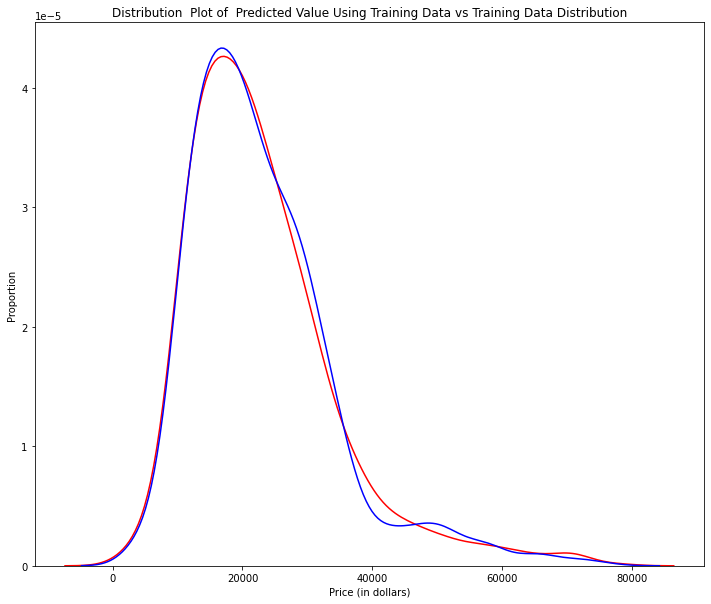

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_predict66, "Actual Values (Test)", "Predicted Values (Test)", Title)